<a href="https://colab.research.google.com/github/satishgunjal/Machine-Learning-Using-Python/blob/master/10_Support_Vector_Machine/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)
1. SVM algorithm is preferred by many as it provide more accurate results with less computational power
2. SVM are mostly used for classification tasks but can also be used for regression tasks as well
3. SVM is suited for extreame cases( where difference between feature is very small. e.g. cat which groomed like a Dog)
4. So the SVM will looks at the extreame points in dataset and draws a boundary (line incase of 2D and hyperplane for more 2D) between those extreame points to separate the features. Which results in best possible segregation of classes
5. Suport vectors are the data points which are close to the opposing class. SO SVM actually only consider these support vectors for defining the classification boundary and ignore's the other training examples
6. e.g. suppose we have a dataset of dogs and cats. In that dataset there is a dog that looks like a cat and a cat thats is groomed like a dog. So our SVM algorithm will use these two extreame examples as support vectors and draws boundary to classify the dogs and cats classes. Since this boundary is based on extream examples(support vector) it will takes care of other training examples as well.
7. SVM will use multiple such support vectors to classify dataset and increase the margin between to classes
8. SVM parameters
   *  Gamma: In case of high value of Gamma decision boundary is dependent of points cloase it where in case of low value of Gamma decision SVM will consider the far away points also while deciding the decision boundary
   *  Regularization parameter(C): Large C will result in overfitting and which will lead to lower bias and high variance. Small C will result in underfitting and which will lead to higher bias and low variance

Problem Statement: We will use IRIS flower dataset from sklearn and try to predict the flow type

We have also used the same dataset in multiclass logistic regression exercise

08_Logistic_Regression_Multiclass_Classification/Exercise_Logistic_Regression_Multiclass_Classification.ipynb

**References:**

[Support Vector Machine](https://youtu.be/FB5EdxAGxQg)

[Support Vector Machine](https://youtu.be/Y6RRHw9uN9o)

[Tutorial](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

[SVM Gamma Parameter](https://youtu.be/m2a2K4lprQw)

In [4]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

## Understanding the IRIS dataset

* iris.DESCR > Complete description of dataset
* iris.data > Data to learn. Each training set is 4 digit array of features. Total 150 training sets
* iris.feature_names > Array of all 4 feature ['sepal length (cm)','sepal width cm)','petal length (cm)','petal width (cm)']
* iris.filename > CSV file name
* iris.target > The classification label. For every training set there is one classification label(0,1,2). Here 0 for setosa, 1 for versicolor and 2 for virginica
* iris.target_names > the meaning of the features. Its a array >> ['setosa', 'versicolor', 'virginica']

From above details its clear that our data is 'iris.data' and labels are 'iris.target'

Since each training example in iris.data is a array of iris.feature_names lets create a dataframe

In [6]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Above dataframe have now independent variables/inputs/X now lets add dependent variables/target/y

In [7]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Considering our target_names array ['setosa', 'versicolor', 'virginica'] 

index 0 > setosa

index 1 > versicolor

index 2 > virginica

# Display records where target = 0 i.e. folower type is setosa

In [8]:
df[df.target == 0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [10]:
df[df.target == 2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


From above data its clear that 0 to 49 records are of type setosa

From above data its clear that 50 to 99 records are of type versicolor

From above data its clear that 100 to 150 records are of type virginica

Now lets add the folower_name column to our datframe

In [11]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x]) # Each value from 'target' is used as index to get corresponding value from 'target_names' 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
df[48:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor


In [14]:
df[98:102]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
98,5.1,2.5,3.0,1.1,1,versicolor
99,5.7,2.8,4.1,1.3,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica


Lets create separate dataframe for each flower type

In [0]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

## Now lets visualize the feature using matplotlib 

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 

Plot the scatter plot of Sepal length vs Sepal Width (Setosa vs Versicolor)

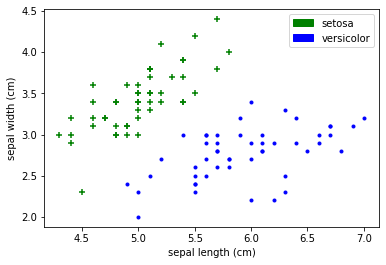

In [47]:
import matplotlib.patches as mpatches

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.')

setosa = mpatches.Patch(color='green', label='setosa')
versicolor = mpatches.Patch(color='blue', label='versicolor')
plt.legend(handles=[setosa,versicolor])
plt.show()

Plot the scatter plot of Petal length vs Petal Width (Setosa vs Versicolor)

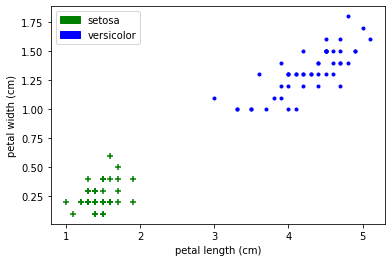

In [46]:
import matplotlib.patches as mpatches

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='.')

setosa = mpatches.Patch(color='green', label='setosa')
versicolor = mpatches.Patch(color='blue', label='versicolor')
plt.legend(handles=[setosa,versicolor])
plt.show()

Lets create the the X and y variables

In [0]:
X = df.drop(['target', 'flower_name'],axis='columns')
y = df['target']

## Lets split the dataset

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print("len of X_train is %s" % (len(X_train)))
print("len of X_test is %s" % (len(X_test)))
print("len of y_train is %s" % (len(y_train)))
print("len of y_test is %s" % (len(y_test)))

len of X_train is 120
len of X_test is 30
len of y_train is 120
len of y_test is 30


## Train the SVM

In [32]:
from sklearn.svm import SVC
model = SVC()

model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
model.score(X_test, y_test)

0.9333333333333333

Now lets predict the value for training set [4.8,3.0,1.5,0.3]

For above data flower type is setosa i.e. index 0

In [34]:
model.predict([[4.8,3.0,1.5,0.3]])

array([0])

## Tunning the SVM parameters

**1. Regularization (C)**

In [54]:
model_C = SVC(C=1) # create model with C =1

model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

In [58]:
model_C_10 = SVC(C=10) # create a model with C =10

model_C_10.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
model_C_10.score(X_test, y_test)

0.9666666666666667

**2. Gamma**

In [56]:
model_g = SVC(gamma=10) # create a model with gamma =10
model_g.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
model_g.score(X_test, y_test)

0.9333333333333333

**3. Kernel**

In [39]:
model_linear_kernel = SVC(kernel='linear')
model_linear_kernel.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
model_linear_kernel.score(X_test,y_test)

0.9666666666666667